### Part 1: Introduction
 
---

Running numpy on GPU, with some nice helper functions.

GPU responsible for small calculations, have a lot more cores than CPU

CPU responsible for large calcultions

In [2]:
import torch

x = torch.Tensor([3,5])
y = torch.Tensor([2,1])
print(x*y)

tensor([6., 5.])


In [3]:
x = torch.zeros([3,1])
x

tensor([[0.],
        [0.],
        [0.]])

In [4]:
x.shape

torch.Size([3, 1])

In [5]:
y = torch.rand([2,5])
y

tensor([[0.9406, 0.7457, 0.2727, 0.8933, 0.9393],
        [0.4339, 0.1879, 0.1300, 0.6488, 0.8180]])

Reshape: flatten the array

In [6]:
y = y.view([1,10])
y

tensor([[0.9406, 0.7457, 0.2727, 0.8933, 0.9393, 0.4339, 0.1879, 0.1300, 0.6488,
         0.8180]])

### Part 2: Data
---

- Is the data machine-learnable?
- 90% of time is spent on data collection
- Vision is the main interest

- Training and testing data sets

> hi

In [11]:
import torchvision
from torchvision import transforms, datasets

- MNIST: hand-drawn digits from 0 to 9
- 28 x 28 image

In [12]:
train = datasets.MNIST("", train=True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))


- Use batch_size, instead of passing data in one go
- because data cannot fit into GPU
- and to hope that the data will generalise
- batch_size between 8 and 64
---
- shuffle: to make neural network generalise/ learn general rules instead of quicker routes

16:00


In [9]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

- Iterate over data

In [13]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [15]:
# x is the image
# y is the label

x, y = data[0][0], data[1][0]

print(y)

tensor(1)


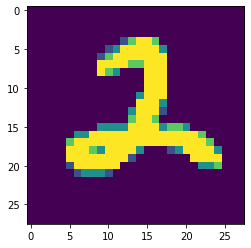

In [20]:
import matplotlib.pyplot as plt

# reshape the tensor to 28 by 28

plt.imshow(data[0][3].view(28,28))

### Balancing dataset
---
-

In [23]:
# printing how balanced the dataset is

total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0 }

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total +=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
    print(f"{i}")